# Mask Detection with Azure Cognitive Services Face API

You can use the mask detection service available with **Azure Face Detection** cloud endpoint in Azure Cogntive
Face API service.
It is available since March 2021.

So you can easily call this API (no need to train a model).
This capability analyses images, detects one or more human faces along with attributes for each face in the image. Face mask attribute is available with the latest **detection_03 model**, along with additional attribute **“noseAndMouthCovered”** that provides insight about whether the mask covers both the nose and mouth.


<img src="https://github.com/retkowsky/AzureCognitiveServicesFaceAPI/blob/main/images/captures/Capturenotebookmask.jpg?raw=true" width=800>

> Documentation: https://azure.microsoft.com/en-us/services/cognitive-services/face/

## 1. Settings

In [1]:
import datetime
now = datetime.datetime.now()
print(now)

2021-12-06 09:04:33.017077


In [2]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [3]:
from pathlib import Path
from urllib.parse import urlparse
import requests
import json
from PIL import Image
from io import BytesIO
from matplotlib import patches
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

In [5]:
face_api_key = 'tobereplaced'
face_endpoint = 'tobereplaced'

face_api_url =  face_endpoint + "/face/v1.0/detect?detectionmodel=detection_03" # Detection-03 is for mask detection

## 2. Test

In [6]:
imagefile = 'https://github.com/retkowsky/AzureCognitiveServicesFaceAPI/blob/main/images/imagemask1.jpg?raw=true'

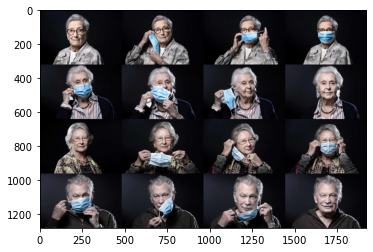

In [7]:
image = io.imread(imagefile)
plt.imshow(image)
plt.show()

In [8]:
headers = {'Ocp-Apim-Subscription-Key': face_api_key }
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'mask',
}

In [9]:
response = requests.post(face_api_url, params=params, headers=headers, json={"url": imagefile})

In [10]:
print("Number of persons=", len(response.json()))

Number of persons= 16


In [11]:
resp=response.json()
resp

[{'faceId': '24a1162e-def3-41fe-b342-78373300aa08',
  'faceRectangle': {'top': 1015, 'left': 1149, 'width': 128, 'height': 188},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': False}}},
 {'faceId': '969179d4-de0a-4afc-9742-3fb9f563a2a9',
  'faceRectangle': {'top': 1012, 'left': 1621, 'width': 128, 'height': 181},
  'faceAttributes': {'mask': {'type': 'noMask',
    'noseAndMouthCovered': False}}},
 {'faceId': '43a80bd3-29d5-4f68-ba64-49b547fff46c',
  'faceRectangle': {'top': 1014, 'left': 658, 'width': 116, 'height': 175},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': False}}},
 {'faceId': '3be5490e-095f-40e6-a711-9987b0266ca5',
  'faceRectangle': {'top': 1014, 'left': 174, 'width': 119, 'height': 168},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': True}}},
 {'faceId': '6f42a092-59be-4ffd-9279-ed9422ae840d',
  'faceRectangle': {'top': 365, 'left': 1631, 'width': 111, 'height': 158},
  'faceAttrib

In [12]:
print(">> Total of persons =", len(response.json()))
print()
for i in range(0,(len(response.json()))) :
    print("Person", i+1,':')
    print("- ID=", resp[i]['faceId'],   
          "\n- Region=", resp[i]['faceRectangle'],
          "\033[0m\n- Mask Detection prediction=", "\033[1;31;34m", resp[i]['faceAttributes']['mask']['type'],
          "\033[0m\n- Nose and Mouth Covered prediction=", "\033[1;31;34m", resp[i]['faceAttributes']['mask']['noseAndMouthCovered'])
    print("\033[0m")

>> Total of persons = 16

Person 1 :
- ID= 24a1162e-def3-41fe-b342-78373300aa08 
- Region= {'top': 1015, 'left': 1149, 'width': 128, 'height': 188} 
- Mask Detection prediction=  faceMask 
- Nose and Mouth Covered prediction=  False

Person 2 :
- ID= 969179d4-de0a-4afc-9742-3fb9f563a2a9 
- Region= {'top': 1012, 'left': 1621, 'width': 128, 'height': 181} 
- Mask Detection prediction=  noMask 
- Nose and Mouth Covered prediction=  False

Person 3 :
- ID= 43a80bd3-29d5-4f68-ba64-49b547fff46c 
- Region= {'top': 1014, 'left': 658, 'width': 116, 'height': 175} 
- Mask Detection prediction=  faceMask 
- Nose and Mouth Covered prediction=  False

Person 4 :
- ID= 3be5490e-095f-40e6-a711-9987b0266ca5 
- Region= {'top': 1014, 'left': 174, 'width': 119, 'height': 168} 
- Mask Detection prediction=  faceMask 
- Nose and Mouth Covered prediction=  True

Person 5 :
- ID= 6f42a092-59be-4ffd-9279-ed9422ae840d 
- Region= {'top': 365, 'left': 1631, 'width': 111, 'height': 158} 
- Mask Detection predicti

In [13]:
def annotate_image(image_url, subscription_key, api_url, show_face_id=False):

    headers = {'Ocp-Apim-Subscription-Key': face_api_key}

    params = {
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'mask',
    }
        
    parsed_url = urlparse(image_url)
    if parsed_url.scheme == 'file':
        image_data = open(parsed_url.path, "rb").read()

        headers['Content-Type']='application/octet-stream'
        response = requests.post(api_url, params=params, headers=headers, data=image_data)

        image = Image.open(parsed_url.path)
    else:
        response = requests.post(api_url, params=params, headers=headers, json={"url": image_url})
        image_file = BytesIO(requests.get(image_url).content)
        image = Image.open(image_file)

    faces = response.json()

    fig, ax = plt.subplots(figsize=(15,15))

    ax.imshow(image, alpha=1)

    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='red')
        ax.axes.add_patch(p)
        
        ax.text(origin[0], origin[1], "Mask Prediction="+ "%s "%(fa["mask"]['type'] ),
                fontsize=12, va="bottom", color="cyan")
        
        ax.text(origin[0], origin[1]+40,  "Nose & Mouth covered="+ "%s"%(fa["mask"]['noseAndMouthCovered'] ),
                fontsize=12, va="bottom", color="lime")
        
        if show_face_id:
            ax.text(origin[0], origin[1]+fr["height"], "%s"%(face["faceId"][:5]),
            fontsize=16, va="bottom", color="red")
    ax.axis("off")

    plt.close()
    return fig, faces

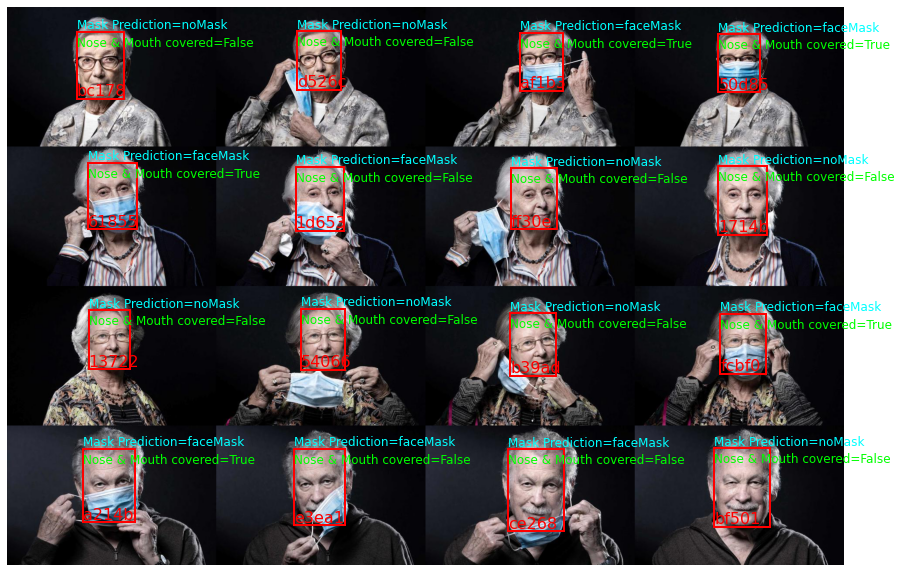

In [14]:
labeled_image, response = annotate_image(imagefile, face_api_key, face_api_url, show_face_id=True)
labeled_image

In [15]:
response

[{'faceId': 'ce2686ac-f5aa-4f64-b413-eb2489e64336',
  'faceRectangle': {'top': 1015, 'left': 1149, 'width': 128, 'height': 188},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': False}}},
 {'faceId': 'bf501728-0c54-4319-8308-51cc58aea5b8',
  'faceRectangle': {'top': 1012, 'left': 1621, 'width': 128, 'height': 181},
  'faceAttributes': {'mask': {'type': 'noMask',
    'noseAndMouthCovered': False}}},
 {'faceId': 'e3ea1c0b-add9-4b26-b05d-31b6e3454d4b',
  'faceRectangle': {'top': 1014, 'left': 658, 'width': 116, 'height': 175},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': False}}},
 {'faceId': 'a214b10d-891f-43bb-987b-42e3c16bccd5',
  'faceRectangle': {'top': 1014, 'left': 174, 'width': 119, 'height': 168},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': True}}},
 {'faceId': '1714b1a1-2813-4840-abb7-8122108adcc3',
  'faceRectangle': {'top': 365, 'left': 1631, 'width': 111, 'height': 158},
  'faceAttrib

## 3. Additional tests

In [16]:
def annotate_image(image_url, subscription_key, api_url, show_face_id=False):

    headers = {'Ocp-Apim-Subscription-Key': face_api_key}

    params = {
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'mask',
    }
        
    parsed_url = urlparse(image_url)
    if parsed_url.scheme == 'file':
        image_data = open(parsed_url.path, "rb").read()

        headers['Content-Type']='application/octet-stream'
        response = requests.post(api_url, params=params, headers=headers, data=image_data)

        image = Image.open(parsed_url.path)
    else:
        response = requests.post(api_url, params=params, headers=headers, json={"url": image_url})
        image_file = BytesIO(requests.get(image_url).content)
        image = Image.open(image_file)

    faces = response.json()

    fig, ax = plt.subplots(figsize=(15,15))

    ax.imshow(image, alpha=1)

    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=5, color='red')
        ax.axes.add_patch(p)
        
        ax.text(origin[0], origin[1], "Mask Prediction="+ "%s "%(fa["mask"]['type'] ),
                fontsize=22, va="bottom", color="cyan")
        
        ax.text(origin[0], origin[1]+25,  "Nose & Mouth covered="+ "%s"%(fa["mask"]['noseAndMouthCovered'] ),
                fontsize=22, va="bottom", color="lime")
        
        if show_face_id:
            ax.text(origin[0], origin[1]+fr["height"], "%s"%(face["faceId"][:5]),
            fontsize=16, va="bottom", color="red")
    ax.axis("off")

    plt.close()
    return fig, faces

In [17]:
imagefile1='https://github.com/retkowsky/AzureCognitiveServicesFaceAPI/blob/main/images/imagemask2.jpg?raw=true'

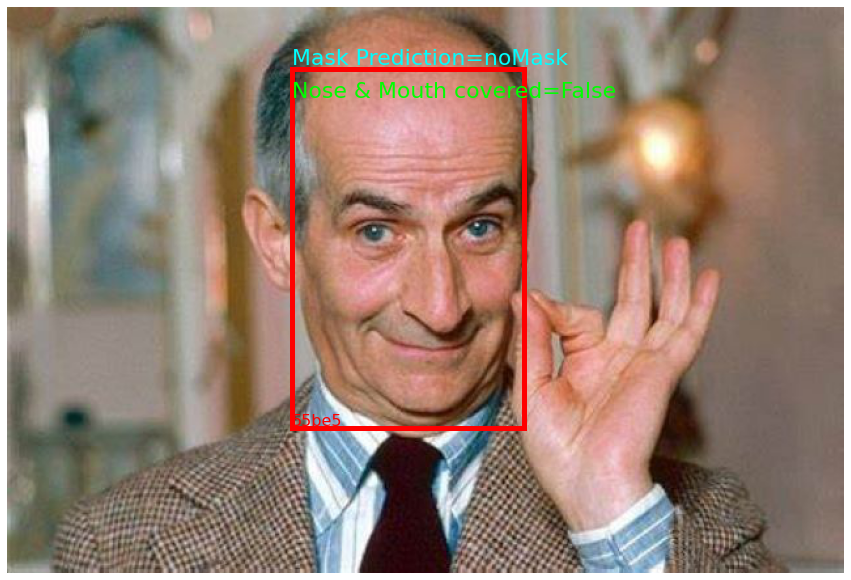

In [18]:
labeled_image1, response1 = annotate_image(imagefile1, face_api_key, face_api_url, show_face_id=True)
labeled_image1

In [19]:
response1

[{'faceId': '55be53f9-38a7-4e81-bb34-613f86a916d8',
  'faceRectangle': {'top': 47, 'left': 217, 'width': 178, 'height': 275},
  'faceAttributes': {'mask': {'type': 'noMask',
    'noseAndMouthCovered': False}}}]

In [20]:
imagefile2='https://github.com/retkowsky/AzureCognitiveServicesFaceAPI/blob/main/images/imagemask3.jpg?raw=true'

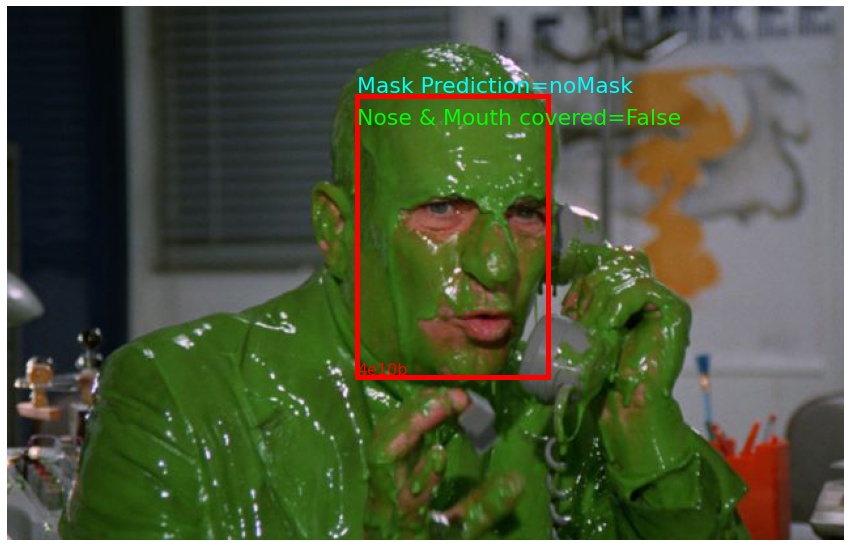

In [21]:
labeled_image2, response2 = annotate_image(imagefile2, face_api_key, face_api_url, show_face_id=True)
labeled_image2

In [22]:
response2

[{'faceId': '4e10b2f7-6c6d-4dee-b3de-f322b6a24b7c',
  'faceRectangle': {'top': 68, 'left': 267, 'width': 146, 'height': 215},
  'faceAttributes': {'mask': {'type': 'noMask',
    'noseAndMouthCovered': False}}}]

In [23]:
imagefile3='https://github.com/retkowsky/AzureCognitiveServicesFaceAPI/blob/main/images/imagemask4.jpg?raw=true'

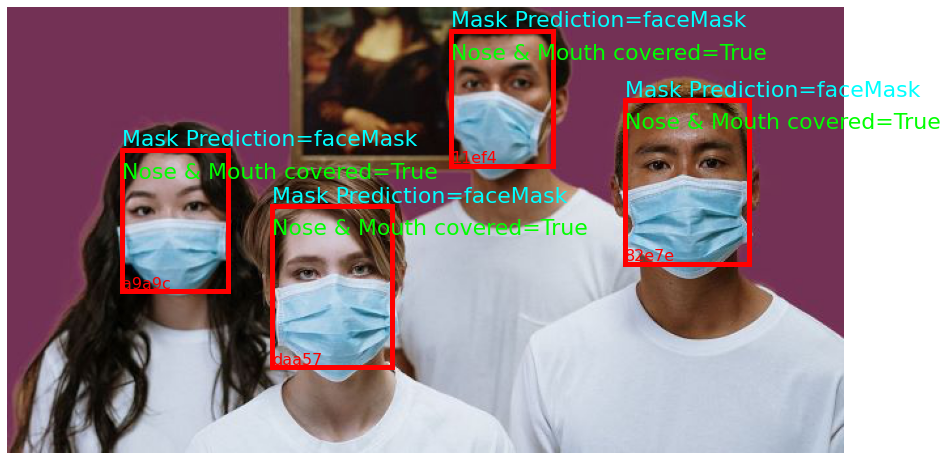

In [24]:
labeled_image3, response3 = annotate_image(imagefile3, face_api_key, face_api_url, show_face_id=True)
labeled_image3

In [25]:
response3

[{'faceId': '82e7e6ca-0451-4bfb-8a4d-93bbf66837ba',
  'faceRectangle': {'top': 71, 'left': 472, 'width': 95, 'height': 125},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': True}}},
 {'faceId': 'daa57c73-4ad9-414b-ac18-399ddbeeb26b',
  'faceRectangle': {'top': 152, 'left': 202, 'width': 92, 'height': 123},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': True}}},
 {'faceId': 'a9a9c0c2-78ab-429e-819f-b493c7e1e52f',
  'faceRectangle': {'top': 109, 'left': 87, 'width': 81, 'height': 108},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': True}}},
 {'faceId': '11ef41f3-6e8f-4cba-a9c3-7c6c0cf7740a',
  'faceRectangle': {'top': 18, 'left': 339, 'width': 78, 'height': 103},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': True}}}]

In [26]:
imagefile4='https://github.com/retkowsky/AzureCognitiveServicesFaceAPI/blob/main/images/imagemask5.jpg?raw=true'

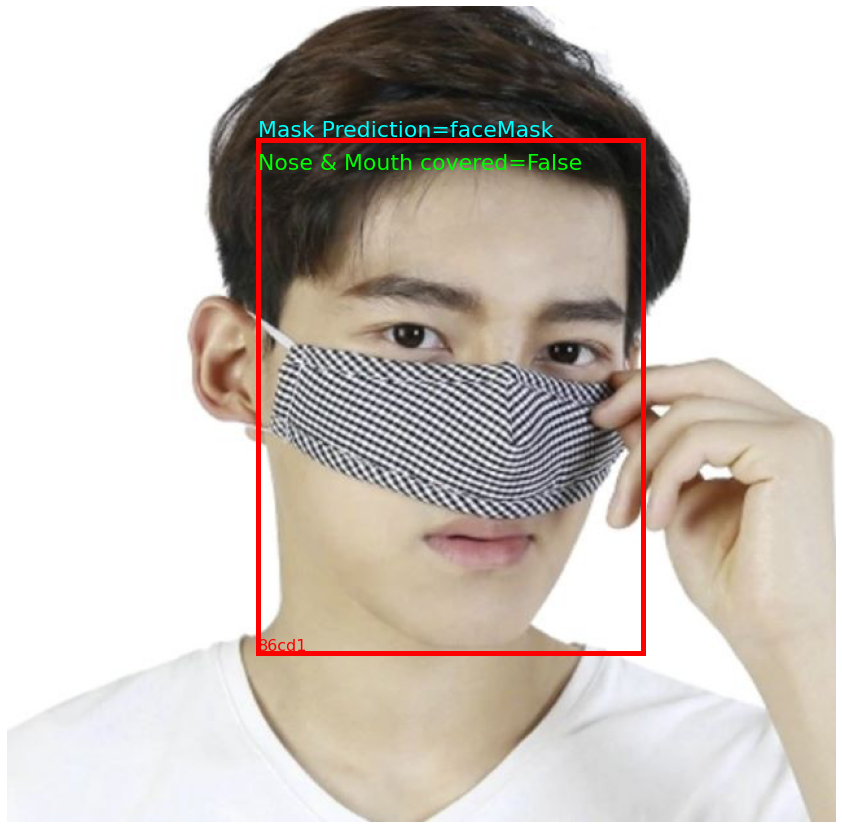

In [27]:
labeled_image4, response4 = annotate_image(imagefile4, face_api_key, face_api_url, show_face_id=True)
labeled_image4

In [28]:
response4

[{'faceId': '86cd17e8-49ad-4c07-88fb-8792ecc912c7',
  'faceRectangle': {'top': 103, 'left': 193, 'width': 298, 'height': 396},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': False}}}]

In [29]:
imagefile5='https://github.com/retkowsky/AzureCognitiveServicesFaceAPI/blob/main/images/imagemask6.jpg?raw=true'

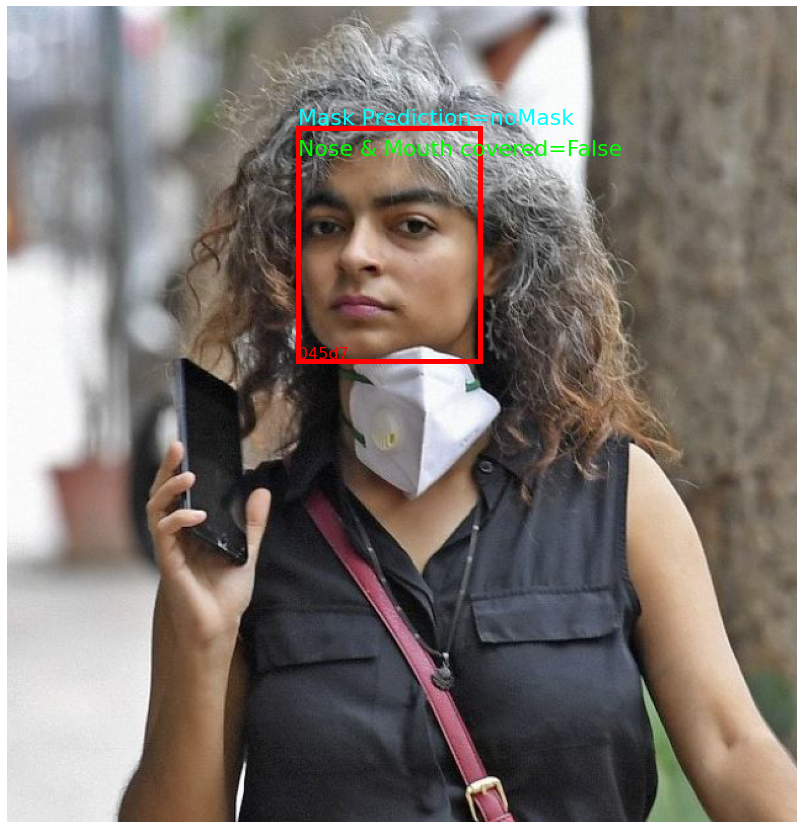

In [30]:
labeled_image5, response5 = annotate_image(imagefile5, face_api_key, face_api_url, show_face_id=True)
labeled_image5

In [31]:
response5

[{'faceId': '045d7299-1667-4dc6-be4a-f0081b78f7b5',
  'faceRectangle': {'top': 98, 'left': 235, 'width': 148, 'height': 189},
  'faceAttributes': {'mask': {'type': 'noMask',
    'noseAndMouthCovered': False}}}]

> End